In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.shape

(205, 26)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 1. Loading and Preprocessing: Load the dataset and perform necessary preprocessingsteps.

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [9]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [10]:
df = df.drop('car_ID', axis=1)

In [11]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [12]:
df['CarName'].unique()  

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CarName'] = le.fit_transform(df['CarName'])

In [14]:
df['CarName'].unique()

array([  2,   3,   1,   4,   5,   9,   7,   6,   8,  10,  11,  12,  15,
        13,  14,  24,  25,  26,  35,  27,  32,  34,  29,  28,  30,  33,
        31,  39,  43,  37,  38,  42,  36,  41,  44,  40,  47,  45,  46,
        49,  48,  50,  52,  51,  61,  59,  58,  53,  54,  60,  55,  57,
        56,  19,  17,  16,  22,  20,  23,  18,  21,  62,  65,  64,  68,
        63,  66,  67,  69,   0,  73,  81,  76,  83,  77,  74,  78,  70,
        79,  71,  72,  80,  82,  75,  85,  84,  86,  88,  87,  92,  89,
        93,  91,  94,  90,  98,  95,  97,  96,  99, 100, 101, 103, 102,
       104, 107, 106, 105, 108, 109, 110, 111, 123, 120, 116, 121, 117,
       112, 125, 115, 118, 114, 119, 122, 126, 127, 124, 113, 128, 129,
       130, 133, 137, 131, 136, 132, 145, 146, 134, 135, 139, 138, 140,
       141, 143, 144, 142])

In [15]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [16]:
df['fueltype'] = pd.get_dummies(df['fueltype'],dtype=int,drop_first=True)

In [17]:
df['fueltype'].unique()

array([1, 0])

In [18]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [19]:
df['aspiration'] = pd.get_dummies(df['aspiration'],dtype=int,drop_first=True)

In [20]:
df['aspiration'].unique()

array([0, 1])

In [21]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [22]:
mapping = {'two':2,'four':4 }
df['doornumber'] = df['doornumber'].map(mapping)
df['doornumber'] = df['doornumber'].astype(int)

In [23]:
df['doornumber'].unique()

array([2, 4])

In [24]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['carbody'] = le.fit_transform(df['carbody'])

In [26]:
df['carbody'].unique()

array([0, 2, 3, 4, 1])

In [27]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['drivewheel'] = le.fit_transform(df['drivewheel'])

In [29]:
df['drivewheel'].unique()

array([2, 1, 0])

In [30]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [31]:
df['enginelocation'] = pd.get_dummies(df['enginelocation'],dtype=int,drop_first=True)
df['enginelocation'].unique()

array([0, 1])

In [32]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['enginetype'] = le.fit_transform(df['enginetype'])
df['enginetype'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [34]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [35]:
cylinder_map = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
df['cylindernumber'] = df['cylindernumber'].map(cylinder_map)
df['cylindernumber'] = df['cylindernumber'].astype(str)

In [36]:
df['cylindernumber'].unique()

array(['4', '6', '5', '3', '12', '2', '8'], dtype=object)

In [37]:
df.loc[df['cylindernumber'].isna(), 'cylindernumber']
df['cylindernumber'] = df['cylindernumber'].astype(int)

In [38]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])
df['fuelsystem'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int64  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int64  
 1

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'symboling'),
  Text(1, 0, 'CarName'),
  Text(2, 0, 'fueltype'),
  Text(3, 0, 'aspiration'),
  Text(4, 0, 'doornumber'),
  Text(5, 0, 'carbody'),
  Text(6, 0, 'drivewheel'),
  Text(7, 0, 'enginelocation'),
  Text(8, 0, 'wheelbase'),
  Text(9, 0, 'carlength'),
  Text(10, 0, 'carwidth'),
  Text(11, 0, 'carheight'),
  Text(12, 0, 'curbweight'),
  Text(13, 0, 'enginetype'),
  Text(14, 0, 'cylindernumber'),
  Text(15, 0, 'enginesize'),
  Text(16, 0, 'fuelsystem'),
  Text(17, 0, 'boreratio'),
  Text(18, 0, 'stroke'),
  Text(19, 0, 'compressionratio'),
  Text(20, 0, 'horsepower'),
  Text(21, 0, 'peakrpm'),
  Text(22, 0, 'citympg'),
  Text(23, 0, 'highwaympg'),
  Text(24, 0, 'price')])

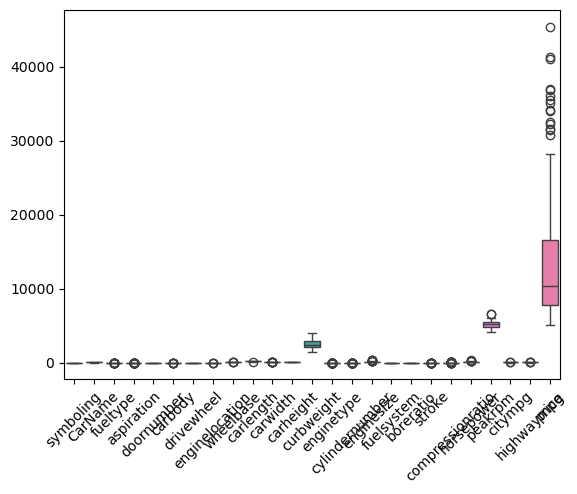

In [41]:
sns.boxplot(df)
plt.xticks(rotation=45)

<Axes: ylabel='price'>

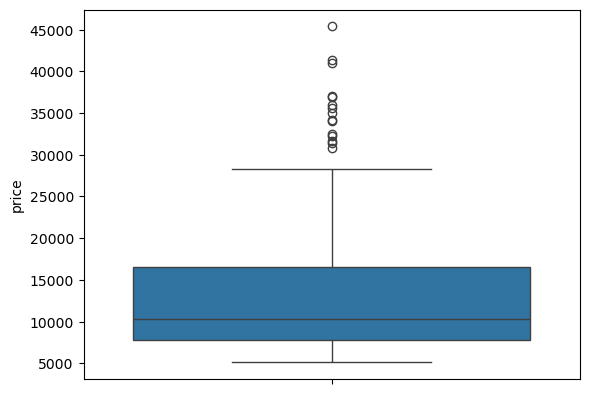

In [42]:
sns.boxplot(df['price'])

<Axes: ylabel='peakrpm'>

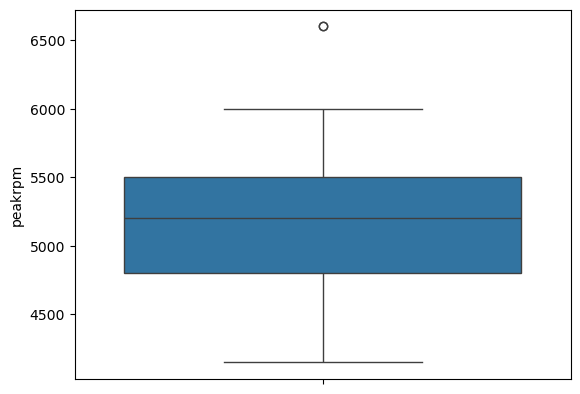

In [43]:
sns.boxplot(df['peakrpm'])

In [44]:
cols = [ 'price', 'peakrpm']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))


<Axes: ylabel='price'>

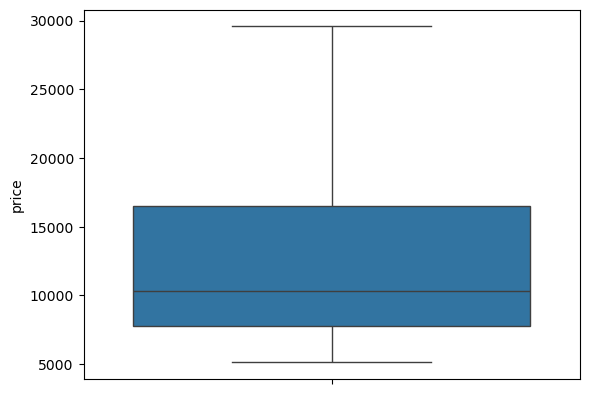

In [45]:
sns.boxplot(df['price'])

<Axes: ylabel='peakrpm'>

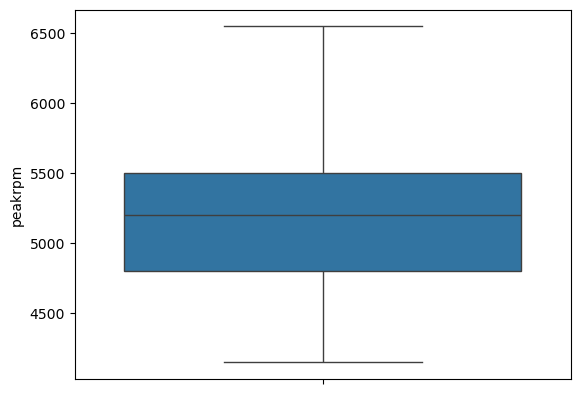

In [46]:
sns.boxplot(df['peakrpm'])

<Axes: >

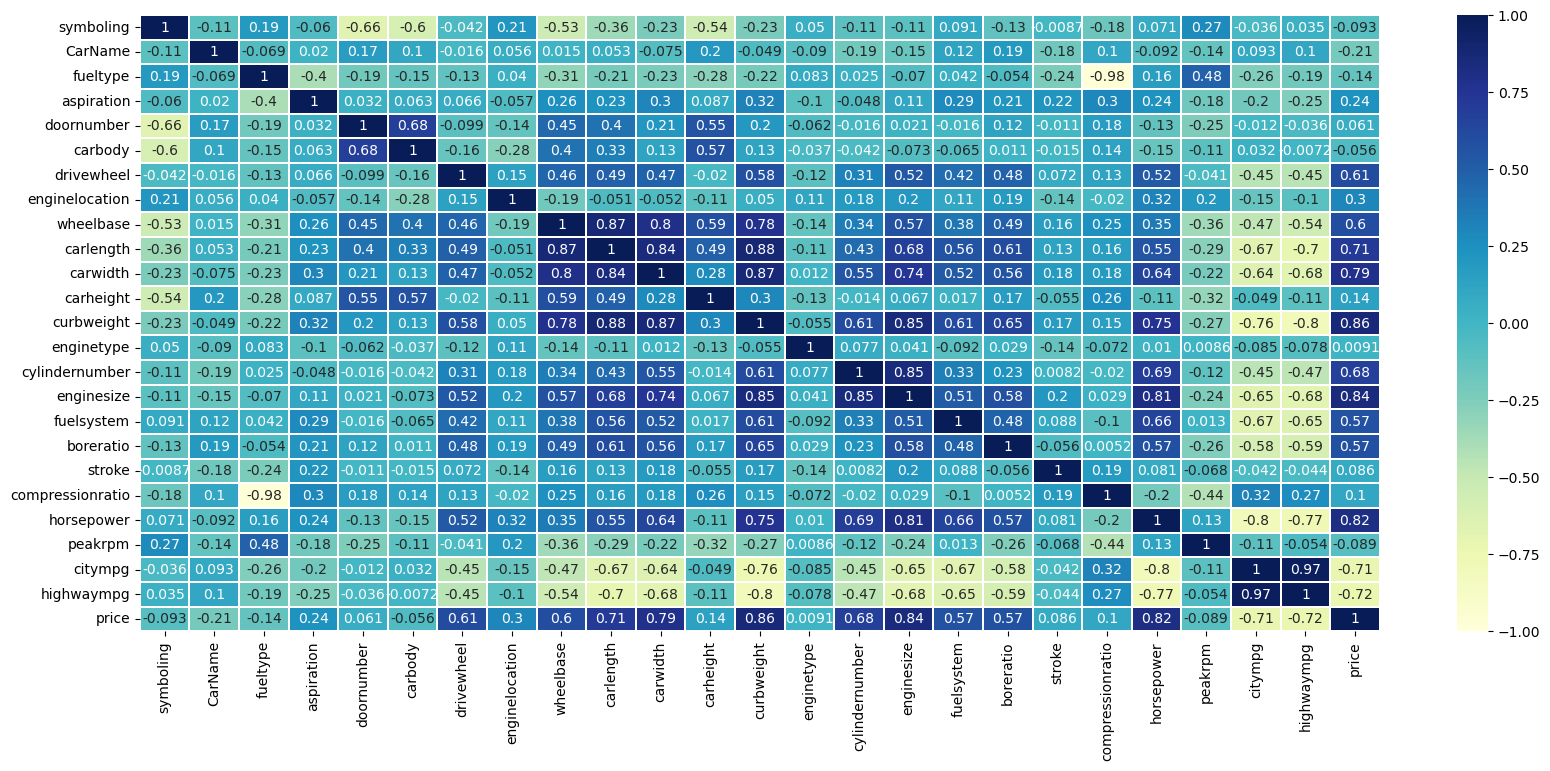

In [47]:
corrmatrix=df.corr()
#corrmatrix
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

In [48]:
features_to_drop = [
    'CarName',           
    'carlength',        
    'wheelbase',         
    'highwaympg',        
    'compressionratio', 
    'stroke',           
    'boreratio',        
    'peakrpm',          
    'symboling'          
]


In [49]:
df.drop(features_to_drop, axis=1, inplace=True)

In [50]:
x=df.drop('price',axis=1)
y=df['price']

In [51]:
x

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,citympg
0,1,0,2,0,2,0,64.1,48.8,2548,0,4,130,5,111,21
1,1,0,2,0,2,0,64.1,48.8,2548,0,4,130,5,111,21
2,1,0,2,2,2,0,65.5,52.4,2823,5,6,152,5,154,19
3,1,0,4,3,1,0,66.2,54.3,2337,3,4,109,5,102,24
4,1,0,4,3,0,0,66.4,54.3,2824,3,5,136,5,115,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,4,3,2,0,68.9,55.5,2952,3,4,141,5,114,23
201,1,1,4,3,2,0,68.8,55.5,3049,3,4,141,5,160,19
202,1,0,4,3,2,0,68.9,55.5,3012,5,6,173,5,134,18
203,0,1,4,3,2,0,68.9,55.5,3217,3,6,145,3,106,26


In [52]:
from sklearn.preprocessing import MinMaxScaler
normalisation = MinMaxScaler()
x=normalisation.fit_transform(x)
# Coverting to Dataframe
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.902439,0.180488,0.560976,0.653659,0.663415,0.014634,0.467317,0.493740,0.414106,0.502439,0.238049,0.248707,0.464808,0.233821,0.339431
std,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.178767,0.203627,0.201971,0.175794,0.108085,0.157142,0.287601,0.164767,0.181726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.316667,0.350000,0.254849,0.500000,0.200000,0.135849,0.142857,0.091667,0.166667
50%,1.000000,0.000000,1.000000,0.750000,0.500000,0.000000,0.433333,0.525000,0.359193,0.500000,0.200000,0.222642,0.714286,0.195833,0.305556
75%,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.550000,0.641667,0.561288,0.500000,0.200000,0.301887,0.714286,0.283333,0.472222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

## 2.Model Implementation : Implement the following five regression algorithms:

**1.Linear Regression**

In [54]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred1 = lr_model.predict(x_test)
y_pred1

array([20863.03045799, 17705.39797124, 10051.33156707, 13403.70545604,
       22443.81461806,  6529.64376216,  8433.90672518,  7940.34770493,
        9795.38014841,  7091.78560007, 14768.07075426,  8799.99786329,
       14718.09738476, 12486.19465905, 28716.44014228,  7518.8235694 ,
       -1382.83932006, 14738.71927175, 10391.63422763, 10372.91736699,
       11314.28609282, 18099.17877328,  7608.39429541,  3152.30527328,
        6439.72000743, 20895.57802927, 13960.82726943, 15487.373916  ,
        5573.54507838, 16100.25257892, 22566.73077621,  7510.56975763,
        5704.18411889, 20483.45005535,  8688.45345274, 23411.6023001 ,
       10833.08392904, 11638.31135744,  5369.34447613, 15106.10568332,
        8540.61285776, 12652.53939402, 17788.8149058 ,  6472.84282718,
        6518.98678242,  9558.64549456,  7510.56975763,  7305.33572802,
       17882.44748586, 14683.31147566,  5074.65645281, 19412.87825702,
        3840.83761465, 10825.76796292,  5522.18998859, 12238.11548146,
      

## Model Evaluation

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

In [56]:
mae

2142.352318625713

In [57]:
mse

8601293.276649136

In [58]:
r2

0.8083445479918259

**2.Decision Tree Regressor**

In [59]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred2 = dtr.predict(x_test)
y_pred2

array([29575.5, 19699. ,  8949. , 15040. , 29575.5,  6338. ,  7609. ,
        8058. ,  8921. ,  7995. ,  9295. ,  8358. , 16925. ,  9279. ,
       29575.5,  6669. ,  5399. , 14869. ,  9279. ,  9995. , 10245. ,
       13499. ,  6669. ,  5572. ,  7609. , 29575.5,  9989. , 16515. ,
        6692. , 15985. , 29575.5,  6189. ,  8058. , 15998. ,  7957. ,
       29575.5, 12945. , 13645. ,  6575. , 14869. ,  7775. , 11549. ,
       16630. ,  7995. ,  7299. ,  8845. ,  6189. ,  7603. , 17950. ,
       14869. ,  5399. , 15998. ,  7299. , 13950. ,  6692. , 12945. ,
        9989. , 13645. , 29575.5,  5572. , 10295. , 18399. ,  9279. ,
       19045. , 12945. ,  6377. , 16430. ,  7295. ])

In [60]:
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

In [61]:
mae

1369.4681323529412

In [62]:
mse

3936812.8304101327

In [63]:
r2

0.9122792796134288

***3.Random Forest Regressor***

In [64]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred3 = rfr.predict(x_test)
y_pred3

array([28713.575     , 18668.875     ,  9147.11      , 13534.        ,
       25713.09      ,  6390.42      ,  8083.86      ,  7996.69      ,
       11625.53      ,  8159.04      , 13361.82      ,  7809.05      ,
       13970.82166667, 10818.77      , 29575.5       ,  6566.32      ,
        5637.01      , 14147.84      ,  8705.92833333, 10599.7       ,
       10259.88833333, 15252.945     ,  6473.23      ,  5818.36      ,
        7279.51      , 28848.11      , 10905.06      , 16619.95      ,
        7141.07      , 16341.29      , 26052.16      ,  6791.59      ,
        8480.57      , 20142.78      ,  8191.7       , 25850.345     ,
       12834.8425    , 13902.45      ,  7101.17      , 14625.58      ,
        8319.91      , 11604.05      , 15946.05      ,  8073.91      ,
        7218.35      ,  8577.86333333,  6791.59      ,  7723.87      ,
       16948.68      , 15030.9475    ,  6981.6       , 17277.905     ,
        6922.395     , 10312.92      ,  7155.57      , 13401.25666667,
      

In [65]:
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

In [66]:
mae

1223.7391372549018

In [67]:
mse

3045882.784094753

In [68]:
r2

0.9321311315666456

***4.Gradient Boosting Regressor***

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train, y_train)
y_pred4=gb_reg.predict(x_test)
y_pred4

array([29238.95042753, 18656.38467238,  9517.08242984, 14137.2025012 ,
       30107.23435642,  6748.29086296,  7897.53730918,  7596.66939976,
       10552.56407804,  8143.07743711, 15895.15691865,  7742.93571729,
       16890.20275856, 10718.19755138, 29491.12591539,  6362.43205297,
        5125.17076378, 14289.59063288,  9132.1794887 ,  9713.72549225,
       10055.29942735, 15102.98661564,  7432.90489104,  5558.45902881,
        6909.68775938, 28501.32053451, 11335.33581608, 16466.74635846,
        6761.50581149, 16643.66399857, 29624.27853685,  6833.8860676 ,
        6708.82819004, 20982.28413005,  7999.88351791, 29964.2367511 ,
       12430.06274694, 13953.33228969,  6808.10819712, 14472.40877131,
        7748.7171965 , 11800.08723252, 15187.36782825,  6664.91973766,
        6984.76588883,  8394.24584902,  6833.8860676 ,  7252.10986412,
       17147.35547309, 16355.35402179,  8263.82867165, 16707.55754038,
        7296.76075802, 10451.06762522,  6761.50581149, 13646.68181978,
      

In [70]:
mae = mean_absolute_error(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

In [71]:
mae

1196.496520099927

In [72]:
mse

2802084.394937777

In [73]:
r2

0.937563487954213

***5.Support Vector Regressor***

In [74]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred5 = svr.predict(x_test)
y_pred5

array([10812.98633825, 10800.12148207, 10785.64556733, 10794.51878446,
       10810.49141151, 10777.22979897, 10792.7755286 , 10782.74880796,
       10796.29823414, 10790.67826308, 10801.76497581, 10784.69784074,
       10806.81672568, 10796.61354897, 10812.87411982, 10782.04231215,
       10779.26870766, 10802.22314714, 10785.80078962, 10794.96822647,
       10787.38624142, 10805.56687261, 10779.23053867, 10778.38964563,
       10781.55152379, 10808.30904278, 10799.57599273, 10808.63929335,
       10782.9038502 , 10808.10268981, 10810.63836837, 10781.79329202,
       10786.38152108, 10810.88294428, 10797.06176814, 10805.25648765,
       10800.37934446, 10793.23119057, 10780.73128617, 10802.46187221,
       10785.46365245, 10800.04355372, 10809.57133503, 10786.5383914 ,
       10781.90019734, 10778.75115667, 10781.79329202, 10778.95634956,
       10809.12614987, 10799.82578425, 10776.65158255, 10804.8983505 ,
       10789.84360178, 10796.16216931, 10782.87277317, 10793.87195659,
      

In [75]:
mae = mean_absolute_error(y_test, y_pred5)
mse = mean_squared_error(y_test, y_pred5)
r2 = r2_score(y_test, y_pred5)

In [76]:
mae

4864.626594783353

In [77]:
mse

47479396.11395412

In [78]:
r2

-0.05794382665673381

### 3. Model Evaluation: Compare the performance of all the models based on R-squared,Mean Squared Error (MSE), and Mean Absolute Error (MAE). Identify the best performing modeland justify why it is the best.

* **Linear Regression**

  - MAE(2142), MSE(8,601,293) High among the models, similarly R2 score is low(0.808). Hence, Weakest among valid models.High bias, underfits non-    linear relationships.Serves as a baseline only.
 
* **Decision Tree Regressor**

  - MAE(1731), MSE(7,208,158) and R2 score(0.839),Better than Linear Regression, Captures non-linearity, Moderate performance.

* **Random Forest Regressor**

  - Very strong model with low MAE(1228), MSE(2,997,674) and High R2 score (0.933), Handles non-linearity with interactions well, Robust to noise.
 
* **Gradient Boosting Regressor**

  - This is the top performing model. Best MAE(1186),Lowest MSE(2,768,400) and Highest R2 score(0.938).Learns patterns sequentially and Better bias–variance tradeoff than RF.

* **Support Vector Regressor**

  - Negative r2 score(-0.058),hence extremely high error,Failed to learn data structure likely due to: No hyperparameter tuning.

#### ***Gradient Boosting Regressor is the top best perfoming model among this.***

### 4. Feature Importance Analysis : Identify the significant variables affecting car prices(feature selection).

* **Most Significant Features Affecting Car Price(Highly correlated)**
  
  - enginesize – strongest predictor; larger engines increase cost

  - horsepower – directly impacts performance and price

  - curbweight – heavier cars tend to be more expensive

  - carwidth – reflects size and comfort segment

  - highwaympg / citympg – fuel efficiency influences valuation
 
* **Less Significant / Redundant Features**

  *These showed low correlation or redundancy and were removed:*

  - CarName           
  - carlength        
  - wheelbase        
  - highwaympg       
  - compressionratio
  - stroke          
  - boreratio        
  - peakrpm          
  - symboling  

### 5. Hyperparameter Tuning: Perform hyperparameter tuning and check whether the performance of the model has increased.

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(
    gbr,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid.fit(x_train, y_train)

best_model = grid.best_estimator_
y_pred6 = best_model.predict(x_test)
y_pred6

array([29607.5448625 , 18656.84346122,  9172.70864713, 13907.72143023,
       30590.80367255,  6579.65600635,  8075.04656968,  7649.33525716,
       10862.60711161,  7967.49262058, 14813.53533832,  7917.62138406,
       17450.84357768, 10795.69732428, 29335.94474432,  6415.85886429,
        5014.6026757 , 13613.6404863 ,  8984.85901021, 10325.47997164,
       10179.08364531, 14612.99406892,  7437.81023212,  5333.80476214,
        7388.98993263, 29087.29956867, 11176.78730154, 16606.84968314,
        6641.44628953, 16491.75339173, 29678.2638474 ,  7232.1868082 ,
        6747.0346745 , 19061.01061905,  7635.19264162, 30131.47576551,
       12653.0922397 , 13796.70592794,  6658.09265639, 14632.21831723,
        7670.72185512, 12511.46804323, 15833.27520279,  6797.63408057,
        7105.70441   ,  8362.3050496 ,  7232.1868082 ,  7392.41699353,
       17430.02187977, 16920.2820381 ,  8352.76032597, 16982.95831041,
        7219.82278529,  9785.10112392,  6641.44628953, 13161.11531987,
      

In [81]:
mae = mean_absolute_error(y_test, y_pred6)
mse = mean_squared_error(y_test, y_pred6)
r2 = r2_score(y_test, y_pred6)

In [82]:
mae

1224.2332412066153

In [83]:
mse

2741788.9037193907

In [84]:
r2

0.9389070021504894

Hyperparameter tuning using GridSearchCV improved the Gradient Boosting Regressor’s performance, resulting in lower error values(MAE and MSE) and higher R2 score. This confirms that tuning enhanced the model’s predictive accuracy.